# Importing Libraries

In [1]:
import pandas as pd
import time
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, matthews_corrcoef, cohen_kappa_score,log_loss
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
print('Imported')

Imported


# Defining the models and datasets to compare

In [2]:
models = [
    "mnoukhov/gpt2-imdb-sentiment-classifier",
    "XSY/albert-base-v2-imdb-calssification",
    "wrmurray/roberta-base-finetuned-imdb",
    "lvwerra/distilbert-imdb",
    
]


# datasets = ['imdb']

# Preparing Dataset

In [3]:
dataset = load_dataset('imdb',streaming=True)

      

In [4]:
data = [item  for item in dataset['test'] if len(item['text']) <512]
len(data)

2640

In [5]:
df = pd.DataFrame(data)

In [6]:
NUM_ROWS = 2000

In [7]:
newDf = pd.concat([df[df.label == 0].head(NUM_ROWS //2),df[df.label ==1].head(NUM_ROWS//2)]).sample(frac = 1).reset_index(drop = True)


In [8]:
newDf.head()

,text,label
0,"Very tightly written, acted, and filmed. Viole...",1
1,The worst movie ever made. If anyone asks you ...,0
2,"Yes, that's true. That movie is a horrible pie...",0
3,This is my favorite Hal Hartley movie. All his...,1
4,"As good as Schindler's List was, I found this ...",1


In [9]:
texts = newDf.text.tolist()
labels = newDf.label.tolist()

<Axes: ylabel='count'>

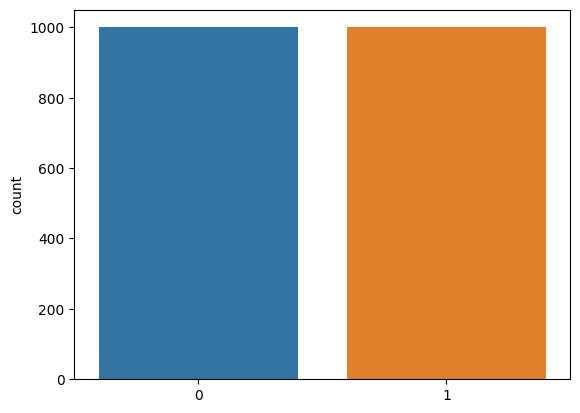

In [10]:
sns.countplot(x = labels)

## Our test data is balanced

# Function to evaluate a model on a dataset

In [11]:
FORMAT_LABELS ={
    'Label_0':0,
    "Label_1":1,
    "POSITIVE":1,
    "NEGATIVE":0,
    'neg':0,
    'pos':1
}

In [12]:
def evaluate_model(model_name):

    print('model initialized')
    pipe = pipeline("text-classification", model=model_name)
    start_time = time.time()
    res = pipe(texts)
    end_time = time.time()
    
    predicted_labels = list(map(lambda x: FORMAT_LABELS.get(x['label'],0),res))
    probs = [ item['score'] for item in res ]
    print('Calculate evaluation metrics')
    # Calculate evaluation metrics
    accuracy = accuracy_score(labels, predicted_labels)
    precision = precision_score(labels, predicted_labels, average="weighted")
    recall = recall_score(labels, predicted_labels, average="weighted")
    f1 = f1_score(labels, predicted_labels, average="weighted")
    roc_auc = roc_auc_score(labels, predicted_labels)
    avg_precision = average_precision_score(labels, predicted_labels)
    mcc = matthews_corrcoef(labels, predicted_labels)
    kappa = cohen_kappa_score(labels, predicted_labels)
    logloss = log_loss(labels,probs)

    # Calculate training time
    training_time = end_time - start_time

    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": roc_auc,
        "Average Precision": avg_precision,
        "Matthews Correlation Coefficient": mcc,
        "Cohen's Kappa": kappa,
        "Time (s)": training_time,
        'Log Loss': logloss,
    }

# Evaluating the models 

In [13]:
results = []

for model_name in models:
        try:
            result = evaluate_model(model_name)
            results.append(result)
            print("Done",model_name)
        except:
            print(model_name)

# making a dataframe
df = pd.DataFrame(results)

model initialized


config.json:   0%|          | 0.00/995 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/510M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/236 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

Calculate evaluation metrics
Done mnoukhov/gpt2-imdb-sentiment-classifier
model initialized


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


config.json:   0%|          | 0.00/889 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/245 [00:00<?, ?B/s]

Calculate evaluation metrics
Done XSY/albert-base-v2-imdb-calssification
model initialized


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Calculate evaluation metrics
Done wrmurray/roberta-base-finetuned-imdb
model initialized


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Calculate evaluation metrics
Done lvwerra/distilbert-imdb


In [14]:
df.head()

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Average Precision,Matthews Correlation Coefficient,Cohen's Kappa,Time (s),Log Loss
0,mnoukhov/gpt2-imdb-sentiment-classifier,0.5000,0.250000,0.5000,0.333333,0.5000,0.500000,0.000000,0.000,453.339331,2.847538
1,XSY/albert-base-v2-imdb-calssification,0.5000,0.250000,0.5000,0.333333,0.5000,0.500000,0.000000,0.000,435.239153,2.325583
2,wrmurray/roberta-base-finetuned-imdb,0.5000,0.250000,0.5000,0.333333,0.5000,0.500000,0.000000,0.000,397.397799,3.108170
3,lvwerra/distilbert-imdb,0.9255,0.925909,0.9255,0.925482,0.9255,0.888356,0.851409,0.851,206.458783,2.205837


In [15]:
df.to_csv("InputForTopsis.csv")